In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [10]:
import streamlit as st 

st.__version__

'1.19.0'

In [2]:
crop_df = pd.read_csv('./data/luong_thuc.csv', parse_dates=['report_date'])

In [3]:
crop_df[(crop_df['geo_level'] == 'Provincial') & 
        (crop_df['attribute'] == 'Area_Harvested')]

,record_id,year,month,report_date,period_type,geo_level,location_name,region_id,region_name_vn,sector,...,unit,data_type,source_file,appendix_number,appendix_title,row_number,extraction_confidence,notes,is_aggregated,data_status
63,8ab9c6d6-9c92-4f37-a378-3a6d027e9a62,2008,11,2008-11-15,Seasonal,Provincial,cả nước,NaN,NaN,Cultivation,...,1000_ha,Actual,2009_11_PHULUC_T11_2009_FINAL_PL1.md,PL1,TỔNG HỢP KẾT QUẢ SẢN XUẤT NÔNG NGHIỆP,1,0.90,Original text: 1. Thu hoạch lúa mùa cả nước,False,Complete
5781,97a4b33c-e701-4a7f-9ef4-5564b3374b3b,2009,8,2009-08-15,Monthly,Provincial,an giang,NaN,NaN,Cultivation,...,ha,Actual,2009_08_PHULUC_T08_2009_PL4.md,PL4,Phụ lục 4,29,0.85,NaN,False,Complete
5794,043d518e-9945-4fb7-ad7d-c8be0fd0b765,2009,8,2009-08-15,Monthly,Provincial,bà rịa-v.tàu,NaN,NaN,Cultivation,...,ha,Actual,2009_08_PHULUC_T08_2009_PL4.md,PL4,Phụ lục 4,25,0.85,NaN,False,Complete
5808,16e20950-4ba6-4e63-a231-be9afde3ac63,2009,8,2009-08-15,Monthly,Provincial,bình dương,NaN,NaN,Cultivation,...,ha,Actual,2009_08_PHULUC_T08_2009_PL4.md,PL4,Phụ lục 4,22,0.85,NaN,False,Complete
5832,55a86c7e-0bdb-4628-a2c8-5905b4a5bfb8,2009,8,2009-08-15,Monthly,Provincial,bình thuận,NaN,NaN,Cultivation,...,ha,Actual,2009_08_PHULUC_T08_2009_PL4.md,PL4,Phụ lục 4,24,0.85,NaN,False,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33158,0fcb1f67-5079-4726-9b6c-359e853a64d3,2012,10,2012-10-15,Monthly,Provincial,đồng tháp,NaN,NaN,Cultivation,...,ha,Actual,2012_10_Phuluc_10_2012_PL3.md,PL3,Phụ lục 3,32,0.85,NaN,False,Complete
33159,0a6427f1-d2a9-4283-b9e7-71138b9ab891,2012,10,2012-10-15,Monthly,Provincial,đồng tháp,NaN,NaN,Cultivation,...,ha,Actual,2012_10_Phuluc_10_2012_PL3.md,PL3,Phụ lục 3,32,0.85,NaN,False,Complete
33324,635a1470-c050-40be-8eda-5fd531432365,2012,11,2012-11-15,Seasonal,Provincial,cả nước,NaN,NaN,Cultivation,...,1000_ha,Actual,2012_11_Phuluc_11_2012_PL1.md,PL1,TỔNG HỢP KẾT QUẢ SẢN XUẤT NÔNG NGHIỆP,2,0.90,Original text: 1. Thu hoạch lúa mùa cả nước,False,Complete
34622,92a906a5-c8d5-4443-91a5-b473e916bff2,2012,11,2012-11-15,Seasonal,Provincial,cả nước,NaN,NaN,Cultivation,...,1000_ha,Actual,2013_11_Phuluc_11_2013-f_PL1.md,PL1,TỔNG HỢP KẾT QUẢ SẢN XUẤT NÔNG NGHIỆP,2,0.90,Original text: 1. Thu hoạch lúa mùa cả nước,False,Complete


In [6]:
crop_df[(crop_df['attribute'] == 'Area_Harvested')]['commodity'].unique()

array(['lúa'], dtype=object)

In [11]:
len(crop_df[(crop_df['attribute'] == 'Area_Planted')]['commodity'].unique())

13

In [4]:
def get_unique_values(columns, df = crop_df):
    if isinstance(columns, str):
        columns = [columns]

    unique_dict = {col: df[col].unique().tolist() for col in columns}
    return unique_dict

In [5]:
def normalize_value(row):
    """Convert all values to their base units"""
    value = row['value']
    unit = row['unit']
    
    if pd.isna(value) or pd.isna(unit):
        return np.nan
    
    # Normalize area to ha (hectares)
    if unit == '1000_ha':
        return value * 1000
    elif unit == 'ha':
        return value
    
    # Normalize currency to USD
    elif unit == '1000_USD':
        return value * 1000
    elif unit == 'million_USD':
        return value * 1_000_000
    elif unit == 'USD':
        return value
    
    # Normalize weight to tons
    elif unit == '1000_tons':
        return value * 1000
    elif unit == 'tons':
        return value
    
    # Default: return as is
    return value

In [6]:
crop_df['normalized_value'] = crop_df.apply(normalize_value, axis=1)

In [8]:
crop_df.columns

Index(['record_id', 'year', 'month', 'report_date', 'period_type', 'geo_level',
       'location_name', 'region_id', 'region_name_vn', 'sector', 'commodity',
       'sub_item', 'attribute', 'value', 'unit', 'data_type', 'source_file',
       'appendix_number', 'appendix_title', 'row_number',
       'extraction_confidence', 'notes', 'is_aggregated', 'data_status',
       'normalized_value'],
      dtype='str')

In [9]:
crop_df['attribute'].unique()

<ArrowStringArray>
[     'Area_Planted',    'Area_Harvested',     'Export_Volume',
      'Export_Value',     'Area_Seedling', 'Investment_Amount',
        'Production',              'Area',        'Percentage',
      'Import_Value',     'Import_Volume']
Length: 11, dtype: str

## value per commodity im/export

In [6]:
df_import = crop_df[(crop_df['attribute'] == 'Import_Value')].copy()
df_export = crop_df[(crop_df['attribute'] == 'Export_Value')].copy()

In [7]:
import_grouped = df_import.groupby('commodity')['normalized_value'].sum().reset_index()
export_grouped = df_export.groupby('commodity')['normalized_value'].sum().reset_index()

In [8]:
trade_df = pd.merge(import_grouped, export_grouped, on='commodity', how='outer', suffixes=('_import', '_export'))
trade_df.fillna(0, inplace=True)

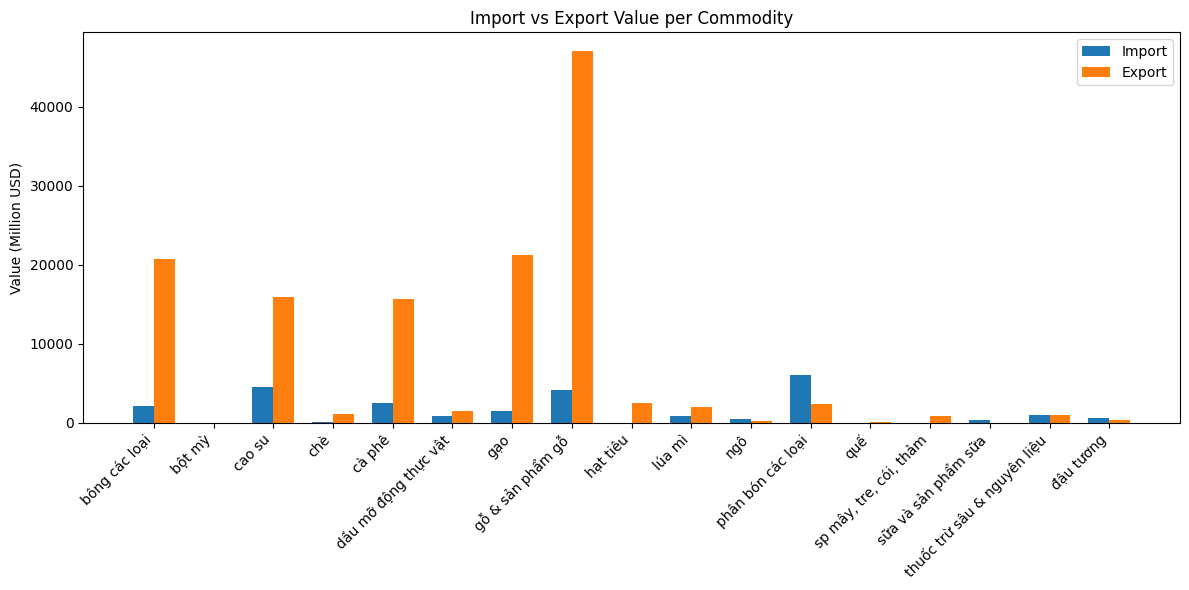

In [9]:
commodities = trade_df['commodity']
import_values = trade_df['normalized_value_import'] / 1e6  # millions
export_values = trade_df['normalized_value_export'] / 1e6  # millions

x = np.arange(len(commodities))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(12,6))
plt.bar(x - width/2, import_values, width, label='Import')
plt.bar(x + width/2, export_values, width, label='Export')

plt.xticks(x, commodities, rotation=45, ha='right')
plt.ylabel('Value (Million USD)')
plt.title('Import vs Export Value per Commodity')
plt.legend()
plt.tight_layout()
plt.show()

## value per commodity area planted/harvested

In [35]:
crop_df

,record_id,year,month,report_date,period_type,geo_level,location_name,region_id,region_name_vn,sector,...,data_type,source_file,appendix_number,appendix_title,row_number,extraction_confidence,notes,is_aggregated,data_status,normalized_value
0,56d69cc1-e879-402d-b46e-b3fbb304ef7c,2008,2,2008-02-15,Seasonal,Provincial,cả nước,NaN,NaN,Cultivation,...,Actual,2009_02_PHULUC_t02_2009_FINAL_PL1.md,PL1,TỔNG HỢP KẾT QUẢ SẢN XUẤT NÔNG NGHIỆP,2,0.90,Original text: 1. Gieo cấy lúa đông xuân cả nước,False,Complete,2180500.0
1,46f2915b-bef9-4919-abe2-b8a586e786a3,2008,2,2008-02-15,Monthly,National,cả nước,NaN,NaN,Cultivation,...,Actual,2009_02_PHULUC_t02_2009_FINAL_PL1.md,PL1,TỔNG HỢP KẾT QUẢ SẢN XUẤT NÔNG NGHIỆP,14,0.90,Original text: 4. Gieo trồng cây công nghiệp n...,True,Complete,180300.0
2,a70f5b83-53ab-45fb-8644-b67b0a514f84,2008,2,2008-02-15,Monthly,National,cả nước,NaN,NaN,Cultivation,...,Actual,2009_02_PHULUC_t02_2009_FINAL_PL1.md,PL1,TỔNG HỢP KẾT QUẢ SẢN XUẤT NÔNG NGHIỆP,12,0.90,Original text: - Khoai lang,True,Complete,79500.0
3,6131f14c-f2d2-4275-a01c-548eff395328,2008,2,2008-02-15,Monthly,National,cả nước,NaN,NaN,Cultivation,...,Actual,2009_02_PHULUC_t02_2009_FINAL_PL1.md,PL1,TỔNG HỢP KẾT QUẢ SẢN XUẤT NÔNG NGHIỆP,16,0.90,Original text: - Lạc,True,Complete,79700.0
4,a340b981-1379-4423-b356-1191da6e4cf7,2008,2,2008-02-15,Monthly,National,cả nước,NaN,NaN,Cultivation,...,Actual,2009_02_PHULUC_t02_2009_FINAL_PL1.md,PL1,TỔNG HỢP KẾT QUẢ SẢN XUẤT NÔNG NGHIỆP,10,0.90,Original text: 3. Gieo trồng màu lương thực(),True,Complete,398000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44183,6d4b711e-4c2e-45fd-89f2-107e24593781,2013,12,2013-12-15,Monthly,Provincial,đồng nai,NaN,NaN,Cultivation,...,Actual,2013_12_Phuluc_12_2013_fi_PL4.md,PL4,Phụ lục 4,23,0.85,NaN,False,Complete,5691.0
44184,c85729e1-e68a-454d-ae31-9aa9ca164f40,2013,12,2013-12-15,Monthly,Provincial,đồng nai,NaN,NaN,Cultivation,...,Actual,2013_12_Phuluc_12_2013_fi_PL4.md,PL4,Phụ lục 4,23,0.85,NaN,False,Complete,11660.0
44185,a6997fa6-365f-44b3-98ec-cf772f6b314a,2013,12,2013-12-15,Monthly,Provincial,đồng nai,NaN,NaN,Cultivation,...,Actual,2013_12_Phuluc_12_2013_fi_PL4.md,PL4,Phụ lục 4,23,0.85,NaN,False,Complete,17.0
44186,7a1f0711-5741-48a1-8bbb-9651c85ac164,2013,12,2013-12-15,Monthly,Provincial,đồng tháp,NaN,NaN,Cultivation,...,Actual,2013_12_Phuluc_12_2013_fi_PL4.md,PL4,Phụ lục 4,32,0.85,NaN,False,Complete,155030.0


In [11]:
crop_df.columns

Index(['record_id', 'year', 'month', 'report_date', 'period_type', 'geo_level',
       'location_name', 'region_id', 'region_name_vn', 'sector', 'commodity',
       'sub_item', 'attribute', 'value', 'unit', 'data_type', 'source_file',
       'appendix_number', 'appendix_title', 'row_number',
       'extraction_confidence', 'notes', 'is_aggregated', 'data_status',
       'normalized_value'],
      dtype='object')

In [29]:
crop_df[(crop_df['attribute'] == 'Import_Value') & (crop_df['location_name'] != 'cả nước')]

,record_id,year,month,report_date,period_type,geo_level,location_name,region_id,region_name_vn,sector,...,data_type,source_file,appendix_number,appendix_title,row_number,extraction_confidence,notes,is_aggregated,data_status,normalized_value
7484,0b1f4519-f486-4d4b-a82c-eca4bad9dd2a,2009,11,2009-11-30,YTD,International,achentina,NaN,NaN,Trade,...,Actual,2009_12_Phuluc_T12_2009_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,25,0.88,Import from ACHENTINA,False,Complete,435785000.0
7486,9b5a7b07-0f8d-4230-b3ed-4b25421e056f,2009,11,2009-11-30,YTD,International,anh,NaN,NaN,Trade,...,Actual,2009_12_Phuluc_T12_2009_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,45,0.88,Import from ANH,False,Complete,11293000.0
7502,6c77be47-10db-4ef4-aca9-73459f04f7bd,2009,11,2009-11-30,YTD,International,ba lan,NaN,NaN,Trade,...,Actual,2009_12_Phuluc_T12_2009_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,21,0.88,Import from BA LAN,False,Complete,16486000.0
7631,f9273212-5739-42d6-a65e-d1d5a4d6e9bc,2009,11,2009-11-30,YTD,International,ca na đa,NaN,NaN,Trade,...,Actual,2009_12_Phuluc_T12_2009_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,8,0.88,Import from CA NA ĐA,False,Complete,52284000.0
7694,2e6f0422-c710-4868-9c6e-1f2cde1dbc47,2009,11,2009-11-30,YTD,International,hoa kỳ,NaN,NaN,Trade,...,Actual,2009_12_Phuluc_T12_2009_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,6,0.88,Import from HOA KỲ,False,Complete,61678000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43531,782f1917-6211-4bb0-9213-7afb9e4418e0,2013,11,2013-11-30,YTD,International,đức,NaN,NaN,Trade,...,Actual,2013_07_Phuluc_07_2013_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,32,0.88,Import from ĐỨC,False,Complete,2034000.0
43537,acd112d9-63b2-46fd-b84b-b4b1621bb34d,2013,11,2013-11-30,YTD,International,đức,NaN,NaN,Trade,...,Actual,2013_07_Phuluc_07_2013_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,3,0.88,Import from ĐỨC,False,Complete,223710000.0
43543,dee34a4b-f2ba-4972-899d-ca340b72c0bb,2013,11,2013-11-30,YTD,International,ấn độ,NaN,NaN,Trade,...,Actual,2013_05_Phuluc_05_2013_c_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,4,0.88,Import from ẤN ĐỘ,False,Complete,101666000.0
43547,279a81c2-47bb-4941-9150-0bf947f6b7b5,2013,11,2013-11-30,YTD,International,ấn độ,NaN,NaN,Trade,...,Actual,2013_07_Phuluc_07_2013_PL12.md,PL12,NGUỒN NHẬP KHẨU CHÍNH,16,0.88,Import from ẤN ĐỘ,False,Complete,56724000.0


In [34]:
get_unique_values(['sub_item'])

{'sub_item': ['Đông Xuân', nan, 'Hè Thu', 'Mùa', 'Xuất khẩu', 'Nhập khẩu']}

In [12]:
crop_df[crop_df['attribute'] == 'Area_Harvested']['commodity'].unique()

array(['lúa'], dtype=object)

In [13]:
df_planted = crop_df[crop_df['attribute'] == 'Area_Planted'].copy()
df_harvested = crop_df[crop_df['attribute'] == 'Area_Harvested'].copy()

In [14]:
planted_grouped = df_planted.groupby('commodity')['normalized_value'].sum().reset_index()
harvested_grouped = df_harvested.groupby('commodity')['normalized_value'].sum().reset_index()

In [15]:
area_compare = pd.merge(planted_grouped, harvested_grouped, on='commodity', how='outer', suffixes=('_planted', '_harvested'))
area_compare.fillna(0, inplace=True)

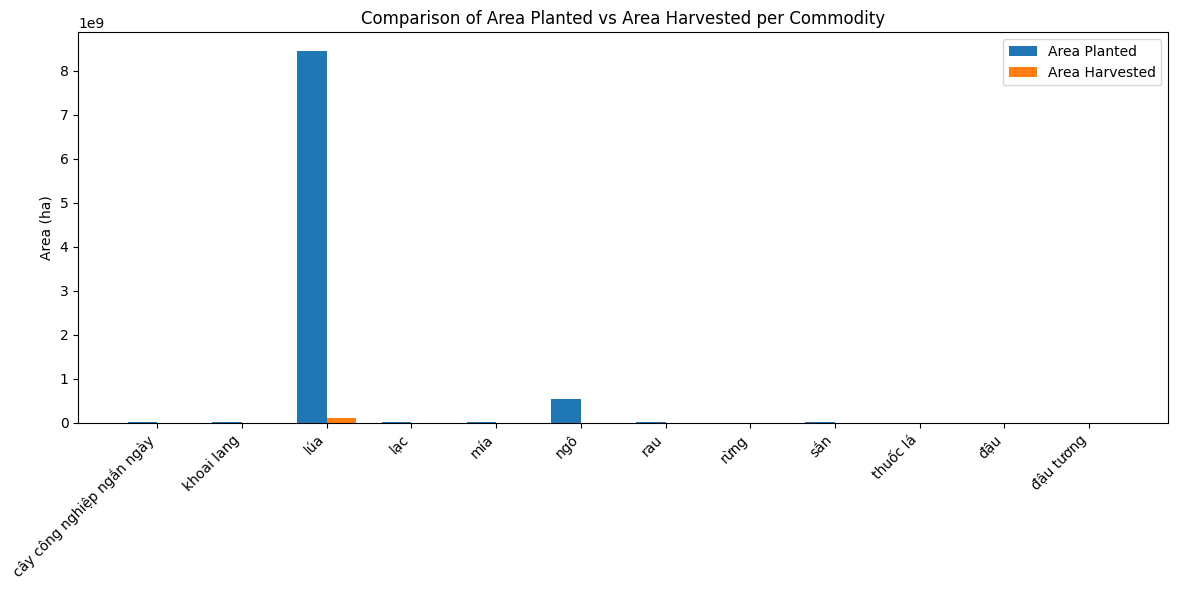

In [18]:
commodities = area_compare['commodity']
planted_values = area_compare['normalized_value_planted']
harvested_values = area_compare['normalized_value_harvested']

x = np.arange(len(commodities))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, planted_values, width, label='Area Planted')
plt.bar(x + width/2, harvested_values, width, label='Area Harvested')

plt.xticks(x, commodities, rotation=45, ha='right')
plt.ylabel('Area (ha)')
plt.title('Comparison of Area Planted vs Area Harvested per Commodity')
plt.legend()
plt.tight_layout()
plt.show()


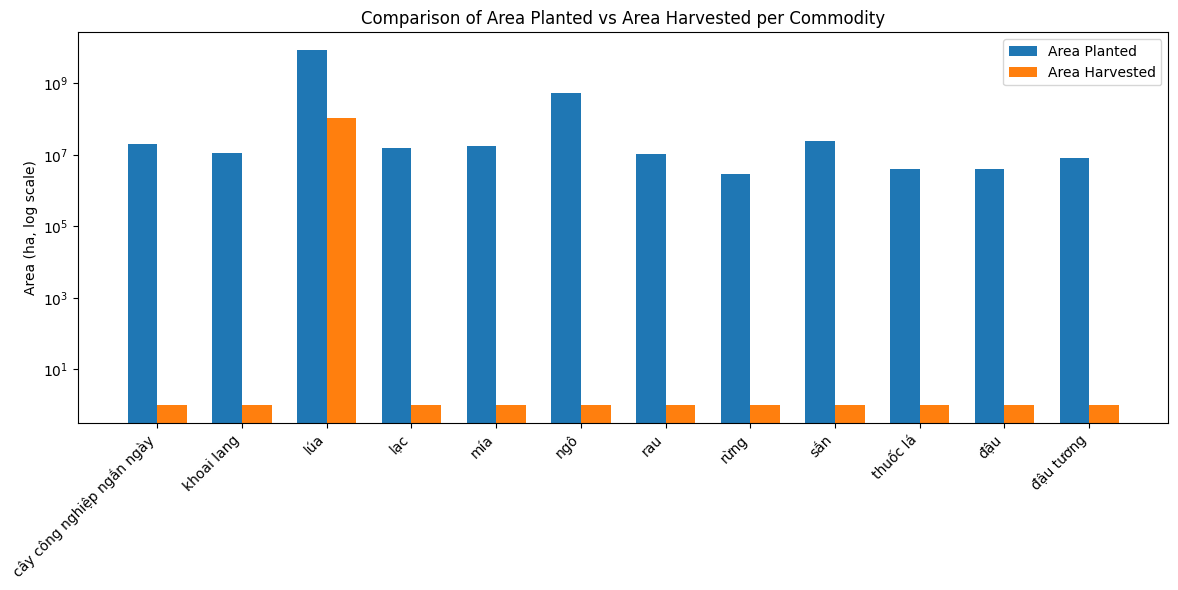

In [19]:
planted_values_safe = planted_values.replace(0, 1)
harvested_values_safe = harvested_values.replace(0, 1)

x = np.arange(len(commodities))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, planted_values_safe, width, label='Area Planted')
plt.bar(x + width/2, harvested_values_safe, width, label='Area Harvested')

plt.xticks(x, commodities, rotation=45, ha='right')
plt.yscale('log')  # log scale
plt.ylabel('Area (ha, log scale)')
plt.title('Comparison of Area Planted vs Area Harvested per Commodity')
plt.legend()
plt.tight_layout()
plt.show()

## disaster

In [20]:
disaster_df = pd.read_excel('./actual_data/disaster-in-vietnam_1900-to-2024.xlsx')

In [21]:
disaster_df

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1953-0019-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,9.156133,NaN,2006-09-17,2023-09-25
1,1956-0050-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,9.288532,NaN,2003-07-01,2023-09-25
2,1964-0004-VNM,Yes,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,10.598376,NaN,2003-07-01,2023-09-25
3,1964-0063-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Iris,VNM,...,NaN,NaN,NaN,NaN,50000.0,471770.0,10.598376,NaN,2006-09-17,2023-09-25
4,1964-0102-VNM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,10.598376,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022-0795-VNM,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,1500.0,1500.0,100.000000,"[{""adm1_code"":3370,""adm1_name"":""Phu Yen""},{""ad...",2022-12-08,2023-09-26
331,2023-0450-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Talim',VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-24,2023-09-26
332,2023-0518-VNM,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-09,2023-09-26
333,2023-0652-VNM,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Building,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-12,2023-10-18


In [ ]:
disaster_df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

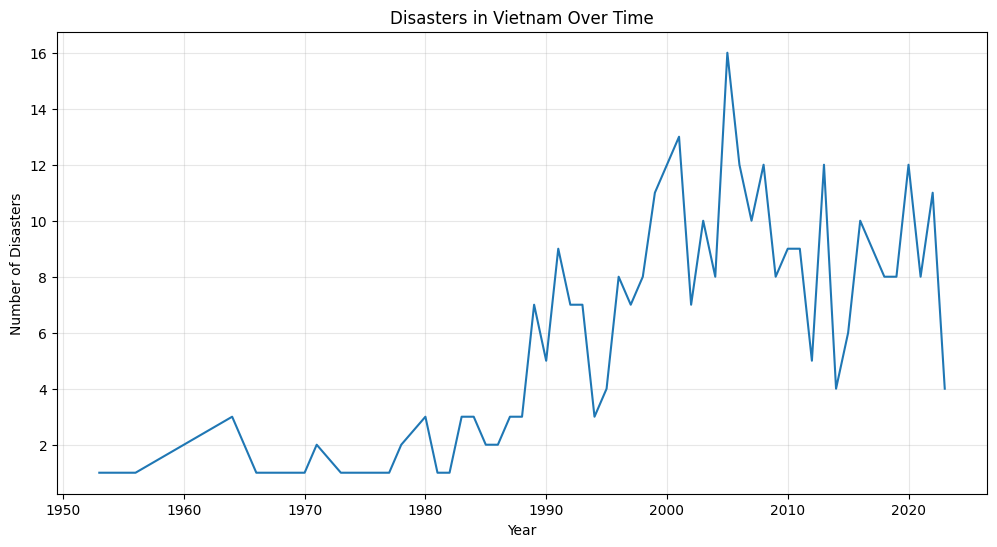

In [ ]:
disasters_per_year = disaster_df.groupby('Start Year').size()
disasters_per_year.plot(kind='line', figsize=(12, 6), title='Disasters in Vietnam Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True, alpha=0.3)
plt.show()

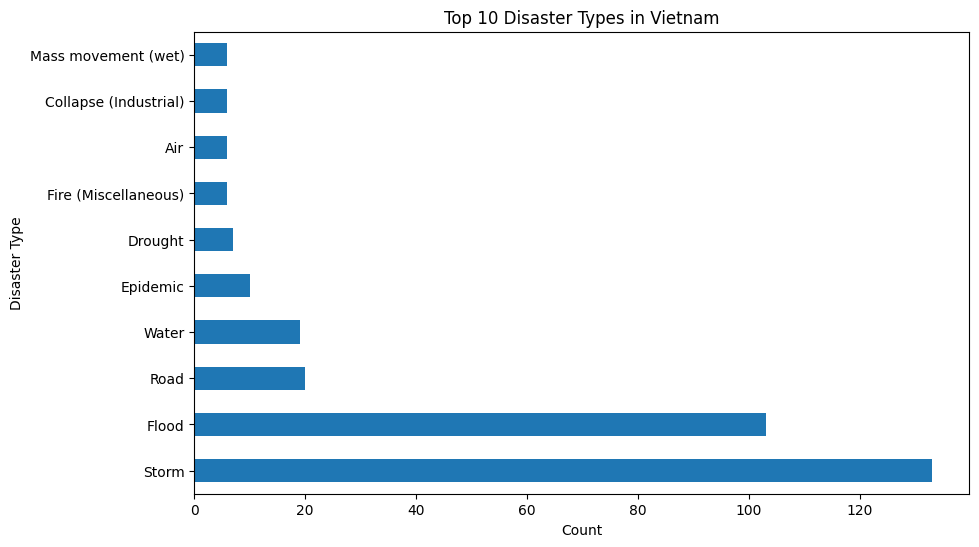

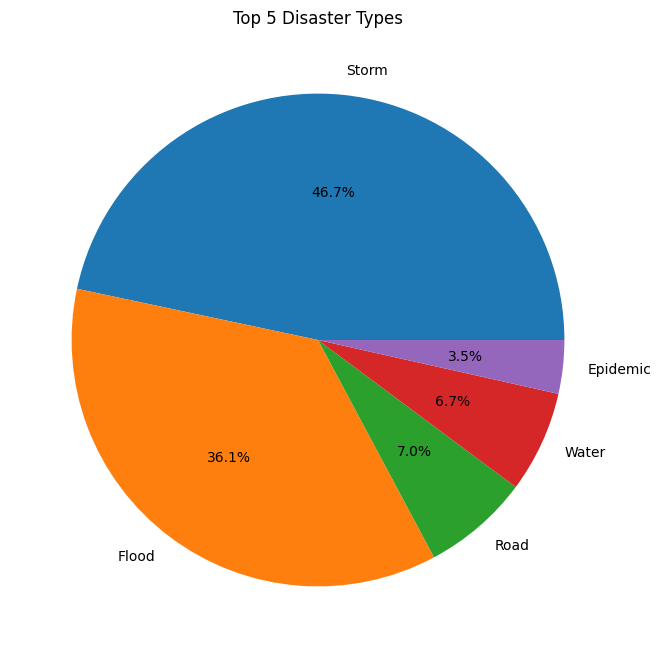

In [ ]:
disaster_df['Disaster Type'].value_counts().head(10).plot(
    kind='barh', figsize=(10, 6), 
    title='Top 10 Disaster Types in Vietnam'
)
plt.xlabel('Count')
plt.show()

# Or as a pie chart for major types
disaster_df['Disaster Type'].value_counts().head(5).plot(
    kind='pie', autopct='%1.1f%%', figsize=(8, 8),
    title='Top 5 Disaster Types'
)
plt.ylabel('')
plt.show()

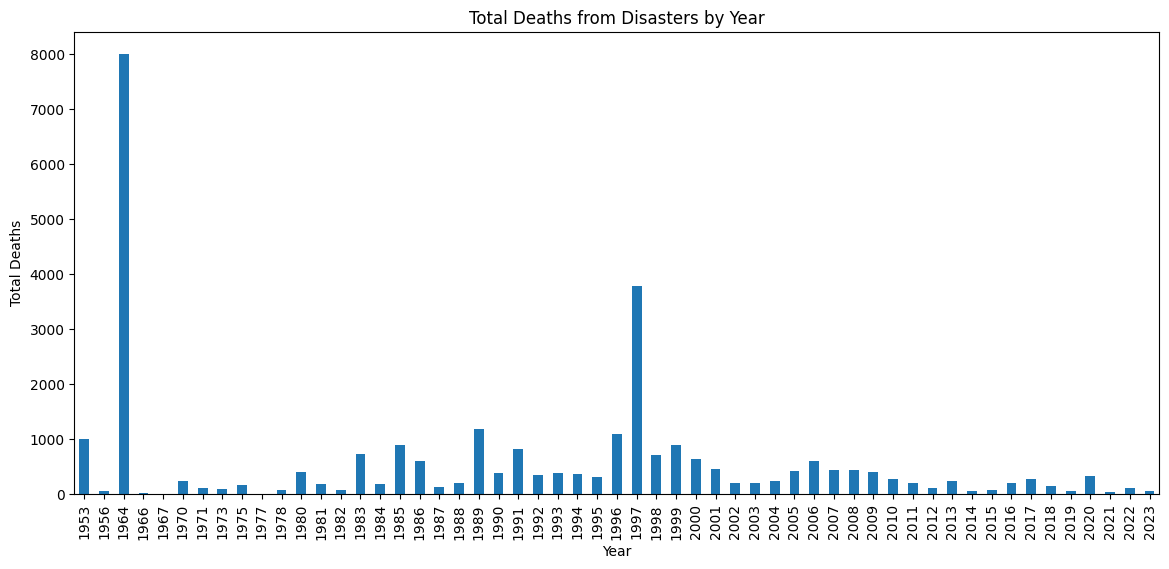

In [ ]:
deaths_by_year = disaster_df.groupby('Start Year')['Total Deaths'].sum()
deaths_by_year.plot(kind='bar', figsize=(14, 6), 
                    title='Total Deaths from Disasters by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()

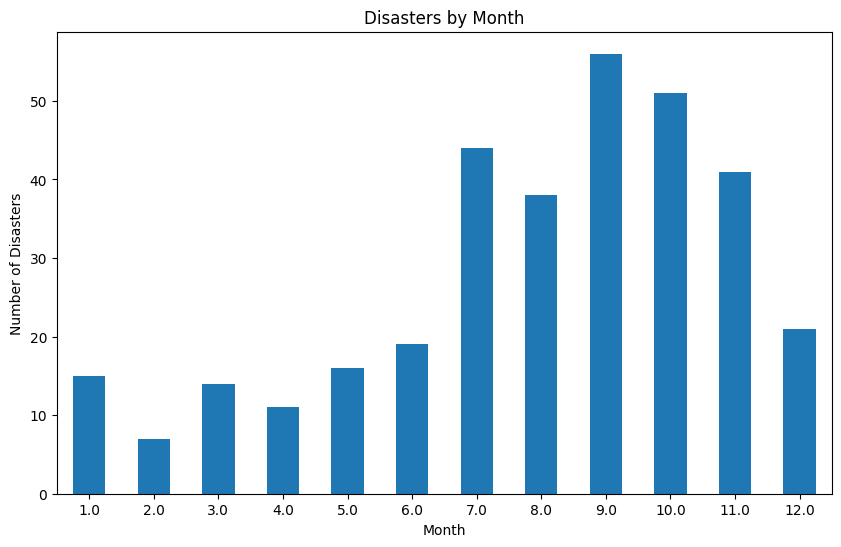

In [ ]:
monthly_dist = disaster_df['Start Month'].value_counts().sort_index()
monthly_dist.plot(kind='bar', figsize=(10, 6),
                  title='Disasters by Month')
plt.xlabel('Month')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=0)
plt.show()

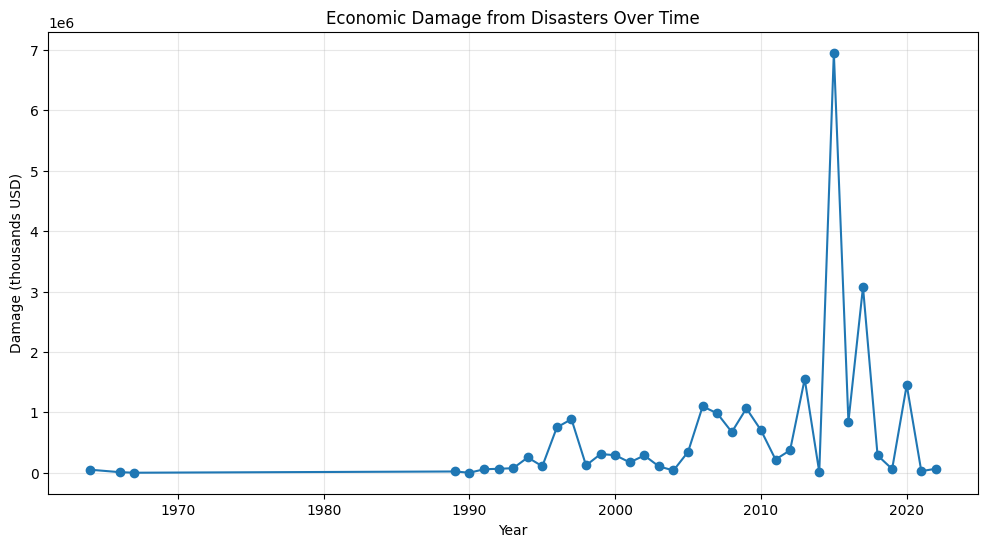

In [ ]:
damage_by_year = disaster_df.groupby('Start Year')['Total Damage (\'000 US$)'].sum()
damage_by_year[damage_by_year > 0].plot(
    kind='line', figsize=(12, 6), marker='o',
    title='Economic Damage from Disasters Over Time'
)
plt.xlabel('Year')
plt.ylabel('Damage (thousands USD)')
plt.grid(True, alpha=0.3)
plt.show()

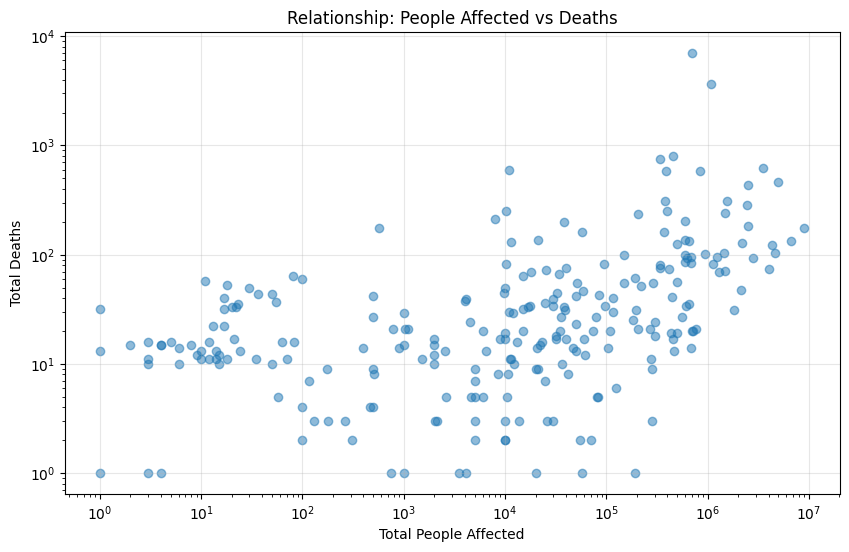

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(disaster_df['Total Affected'], disaster_df['Total Deaths'], alpha=0.5)
plt.xlabel('Total People Affected')
plt.ylabel('Total Deaths')
plt.title('Relationship: People Affected vs Deaths')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

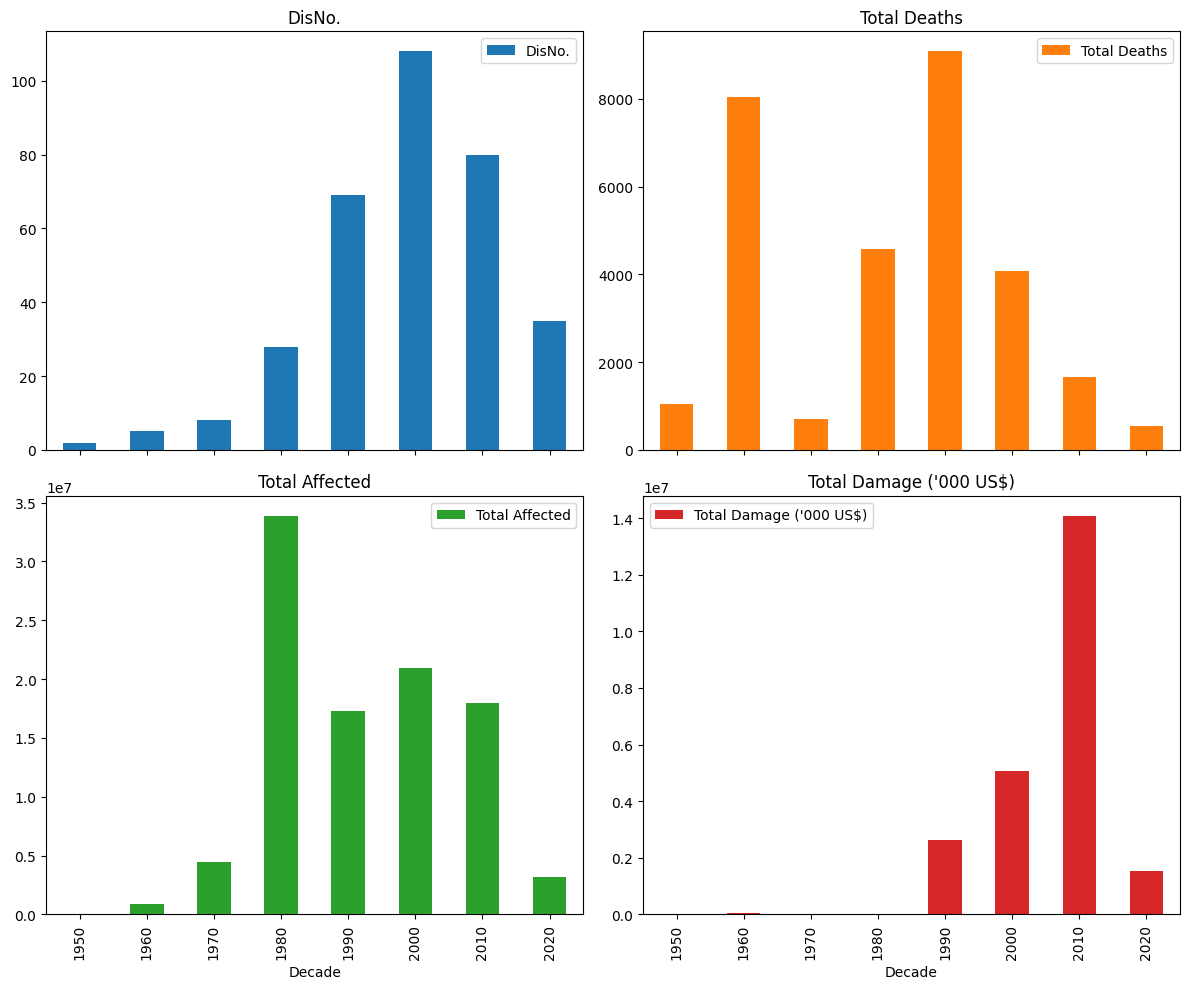

In [ ]:
disaster_df['Decade'] = (disaster_df['Start Year'] // 10) * 10
decade_summary = disaster_df.groupby('Decade').agg({
    'DisNo.': 'count',
    'Total Deaths': 'sum',
    'Total Affected': 'sum',
    'Total Damage (\'000 US$)': 'sum'
})
decade_summary.plot(kind='bar', subplots=True, figsize=(12, 10), layout=(2, 2))
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('./actual_data/luong_thuc.csv')

# Create a normalized value column
def normalize_value(row):
    value = row['value']
    unit = row['unit']
    
    # Normalize area to ha
    if unit == '1000_ha':
        return value * 1000
    elif unit == 'ha':
        return value
    
    # Normalize currency to USD
    elif unit == '1000_USD':
        return value * 1000
    elif unit == 'million_USD':
        return value * 1_000_000
    
    return value

df['normalized_value'] = df.apply(normalize_value, axis=1)

Text(0.5, 0, 'Year-Month')

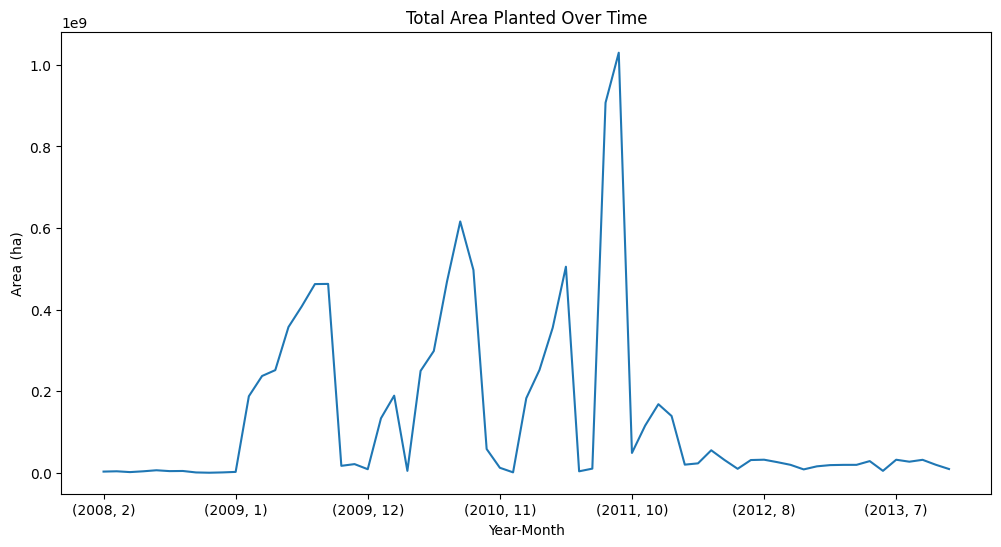

In [ ]:
area_data = df[df['attribute'] == 'Area_Planted'].copy()

# Group by time
time_series = area_data.groupby(['year', 'month'])['normalized_value'].sum()

# Plot
time_series.plot(kind='line', figsize=(12, 6))
plt.title('Total Area Planted Over Time')
plt.ylabel('Area (ha)')
plt.xlabel('Year-Month')

Text(0.5, 0, 'Year')

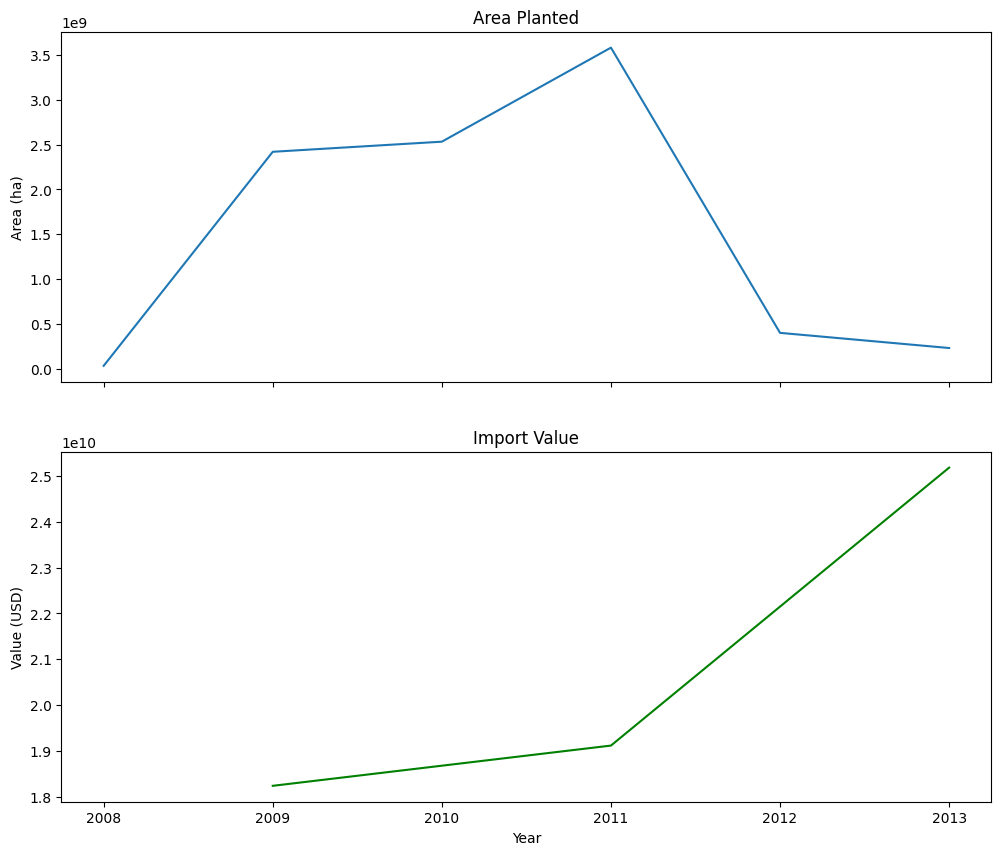

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Area_Planted on first subplot
area = df[df['attribute'] == 'Area_Planted'].groupby('year')['normalized_value'].sum()
axes[0].plot(area.index, area.values)
axes[0].set_ylabel('Area (ha)')
axes[0].set_title('Area Planted')

# Plot Import_Value on second subplot
imports = df[df['attribute'] == 'Import_Value'].groupby('year')['normalized_value'].sum()
axes[1].plot(imports.index, imports.values, color='green')
axes[1].set_ylabel('Value (USD)')
axes[1].set_title('Import Value')
axes[1].set_xlabel('Year')

In [ ]:
import plotly.express as px

# Create attribute-specific dataframes
for attr in df['attribute'].unique():
    attr_data = df[df['attribute'] == attr].copy()
    
    fig = px.line(attr_data.groupby('year')['normalized_value'].sum().reset_index(),
                  x='year', y='normalized_value',
                  title=f'{attr} Over Time')
    fig.show()

In [ ]:
# Categorize attributes by unit type
area_attrs = df[df['unit'].isin(['ha', '1000_ha'])]['attribute'].unique()
value_attrs = df[df['unit'].isin(['1000_USD', 'million_USD'])]['attribute'].unique()

# Create separate visualizations
for attr in area_attrs:
    data = df[df['attribute'] == attr]
    # ... plot area-based metrics
    
for attr in value_attrs:
    data = df[df['attribute'] == attr]
    # ... plot value-based metrics